In [1]:
#Procedure to import numpy and pandas
import pandas as pd
import numpy as np

In [2]:
#Importing CSV data using backward arrow to call the file path
Office_Data = pd.read_csv(r"C:\Users\Yosef\Downloads\the_office_series.csv")

In [3]:
#Importing CSV data using forward arrow to call the file path
Office_Data1 = pd.read_csv("C:/Users/Yosef/Downloads/the_office_series.csv")

In [4]:
Office_Data.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [5]:
Office_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


In [6]:
Office_Data.shape

(188, 12)

In [7]:
#manage Null Values by creating similar column without missing values
Office_Data["Guests_participated"] = np.where(Office_Data.GuestStars.isnull(), False, True)
print(Office_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           188 non-null    int64  
 1   Season               188 non-null    int64  
 2   EpisodeTitle         188 non-null    object 
 3   About                188 non-null    object 
 4   Ratings              188 non-null    float64
 5   Votes                188 non-null    int64  
 6   Viewership           188 non-null    float64
 7   Duration             188 non-null    int64  
 8   Date                 188 non-null    object 
 9   GuestStars           29 non-null     object 
 10  Director             188 non-null    object 
 11  Writers              188 non-null    object 
 12  Guests_participated  188 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 17.9+ KB
None


In [8]:
#Rename unnamed column as Episode_Number
Office_Data = Office_Data.rename(columns={"Unnamed: 0" : "Episode_Number"})

In [9]:
#To See columen names in the Office Data Set.
Office_Data.columns

Index(['Episode_Number', 'Season', 'EpisodeTitle', 'About', 'Ratings', 'Votes',
       'Viewership', 'Duration', 'Date', 'GuestStars', 'Director', 'Writers',
       'Guests_participated'],
      dtype='object')

In [15]:
#Change the index from the first column to Episode_Number
#Office_Data = Office_Data.reset_index("Episode_Number")

In [16]:
#import MinMax Scaler and Normalize the New column Ratings_Normal
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Office_Data[["Ratings_Normal"]] = scaler.fit_transform(Office_Data[["Ratings"]])
print(Office_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Episode_Number       188 non-null    int64  
 1   Season               188 non-null    int64  
 2   EpisodeTitle         188 non-null    object 
 3   About                188 non-null    object 
 4   Ratings              188 non-null    float64
 5   Votes                188 non-null    int64  
 6   Viewership           188 non-null    float64
 7   Duration             188 non-null    int64  
 8   Date                 188 non-null    object 
 9   GuestStars           29 non-null     object 
 10  Director             188 non-null    object 
 11  Writers              188 non-null    object 
 12  Guests_participated  188 non-null    bool   
 13  Ratings_Normal       188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB
None


In [63]:
Office_Data.columns

Index(['Episode_Number', 'Season', 'EpisodeTitle', 'About', 'Ratings', 'Votes',
       'Viewership', 'Duration', 'Date', 'GuestStars', 'Director', 'Writers',
       'Guests_participated', 'Ratings_Normal'],
      dtype='object')

In [48]:
#To get mean value of each Seasons Ratings.
Office_Data.groupby("Season")["Ratings_Normal"].agg([min, max, np.median, np.mean])

,min,max,median,mean
Season,,,,
1,0.28125,0.56250,0.421875,0.427083
2,0.37500,0.87500,0.562500,0.575284
3,0.40625,0.84375,0.625000,0.620924
4,0.37500,0.90625,0.609375,0.613839
5,0.43750,0.96875,0.562500,0.590144
6,0.06250,0.87500,0.468750,0.498798
7,0.25000,1.00000,0.500000,0.533854
8,0.00000,0.46875,0.343750,0.313802
9,0.12500,1.00000,0.375000,0.410326


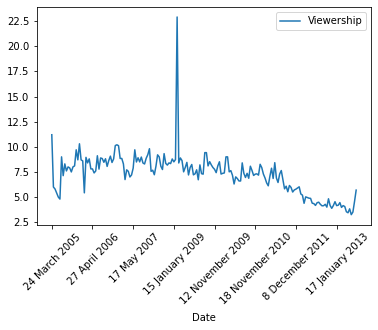

In [61]:
import matplotlib.pyplot as plt
Office_Data.plot(x="Date", y="Viewership", kind="line", rot=45)
plt.show()

In [64]:
# create a column called colors
colors = []
for lab, row in Office_Data.iterrows():
    if row['Ratings_Normal'] < 0.25:
        colors.append("red")
    elif 0.25 <= row['Ratings_Normal'] < 0.50:
        colors.append("orange")
    elif 0.50 <= row['Ratings_Normal'] < 0.75:
        colors.append("lightgreen")
    else:
        colors.append("darkgreen")

In [65]:
#Create a column called SIZE
sizes = []

for lab, row in Office_Data.iterrows():
    if row['Guests_participated'] == True:
        sizes.append(250)
    else:
        sizes.append(25)

<AxesSubplot:xlabel='Season'>

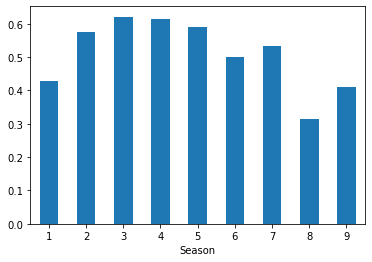

In [67]:
Office_Data.groupby("Season")["Ratings_Normal"].mean().plot.bar(rot=0)

<AxesSubplot:xlabel='Season'>

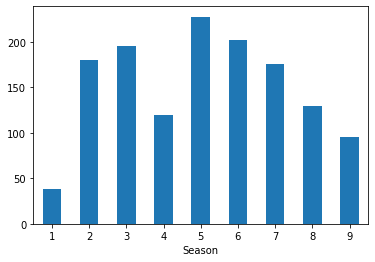

In [71]:
Office_Data.groupby("Season")["Viewership"].sum().plot.bar(rot=0)

<AxesSubplot:xlabel='Season'>

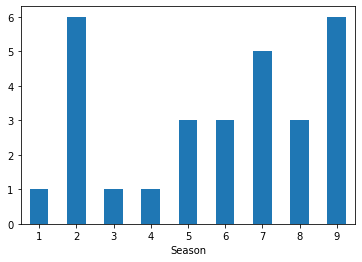

In [70]:
Office_Data.groupby("Season")["Guests_participated"].sum().plot.bar(rot=0)

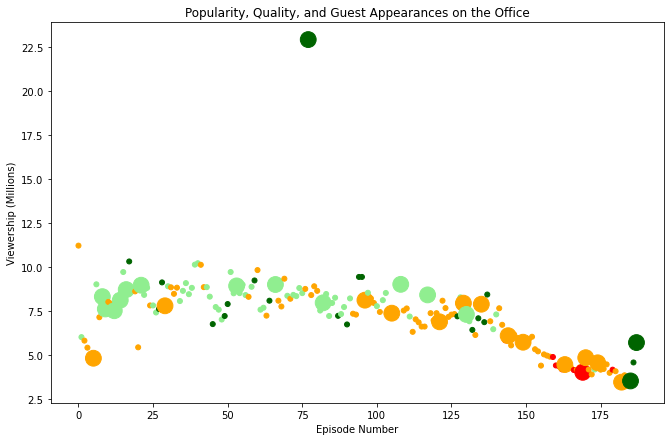

In [72]:
#Create Scatter Plot
fig = plt.figure(figsize=(11,7))
plt.scatter(Office_Data["Episode_Number"], Office_Data["Viewership"], c = colors, s = sizes)
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.show()

In [79]:
#Answer for the Guest Stars with Higest Viewers
Most_Watched = max(Office_Data["Viewership"])
most_watched_film = Office_Data.loc[Office_Data["Viewership"] == Most_Watched]
top_star = most_watched_film[["GuestStars"]]
print(top_star)
top_star = 'Jack Black'
print(top_star)


                                   GuestStars
77  Cloris Leachman, Jack Black, Jessica Alba
Jack Black
